In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [3]:
df_rotacion = pd.read_csv('../files/raw/df_filtrado_notnulls.csv')

In [4]:
df_rotacion.sample(10)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
1266,no,travel_rarely,1.0,4,4.0,female,3,5,4,divorced,3,no,11,full_time,1,3,7,6,1973,no,10.0,195170.00,2.0
996,no,unknown,15.0,2,1.0,male,3,1,3,unknown,1,no,16,none,1,5,4,2,1995,yes,4.0,22070.00,2.0
585,yes,unknown,7.0,2,3.0,male,2,2,3,unknown,2,yes,12,full_time,2,6,6,0,1983,yes,8.0,63800.00,3.0
1596,no,unknown,2.0,2,3.0,female,4,2,2,unknown,1,no,24,part_time,1,2,8,7,1983,yes,8.0,42440.00,3.0
546,no,travel_frequently,10.0,3,4.0,female,3,1,2,divorced,0,no,14,part_time,2,2,7,1,1994,yes,8.0,28111.13,2.0
443,no,unknown,1.0,5,1.0,male,3,2,4,married,4,yes,11,none,0,3,10,2,1979,yes,14.0,53914.11,3.0
1528,no,travel_rarely,1.0,2,4.0,male,3,1,2,unknown,1,no,11,part_time,1,2,5,4,1996,yes,5.0,28111.13,3.0
1389,no,travel_frequently,25.0,3,2.0,female,3,5,2,unknown,3,none,22,full_time,0,4,0,0,1978,no,22.0,180610.00,3.0
1069,no,unknown,7.0,2,4.0,male,3,2,4,divorced,3,none,18,none,0,2,2,2,1983,no,8.0,53914.11,3.0
1196,no,travel_rarely,10.0,4,3.0,female,3,1,3,married,1,yes,19,part_time,1,2,1,0,1989,no,1.0,28111.13,3.0


In [5]:
df_rotacion.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [6]:
df_rotacion.shape

(1614, 23)

In [7]:
df_rotacion = df_rotacion[df_rotacion['employee_turnover']=='yes']

In [8]:
df_rotacion.shape

(259, 23)

In [9]:
df_rotacion['employee_turnover'].value_counts()

employee_turnover
yes    259
Name: count, dtype: int64

In [10]:
df_rotacion = df_rotacion.drop(['employee_turnover', 'education_level','marital_status',
    'num_companies_worked','percent_salary_hike', 'stock_option_level', 'stock_option_level',
    'training_sessions_last_year', 
    'total_years_worked'], axis = 1)

In [11]:
df_rotacion

,business_travel_frequency,distance_from_home_km,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,overtime_hours,standard_work_hours,years_at_company,years_with_current_manager,birth_year,remote_work,annual_salary,work_life_balance
13,travel_rarely,12.0,2.0,female,3,5,3,no,full_time,22,8,1982,no,195450.00,3.0
16,travel_rarely,2.0,4.0,male,3,5,2,yes,full_time,31,8,1965,no,192460.00,3.0
26,unknown,2.0,1.0,female,1,5,4,no,full_time,32,9,1971,yes,198450.00,3.0
43,travel_rarely,16.0,3.0,female,4,1,1,none,part_time,17,14,1987,yes,28111.13,3.0
52,travel_rarely,10.0,4.0,male,2,3,1,none,none,13,0,1988,no,53914.11,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,unknown,1.0,1.0,female,1,1,2,yes,part_time,7,7,1995,yes,22160.00,3.0
1600,unknown,2.0,3.0,male,3,2,4,none,none,9,3,1968,yes,53914.11,2.0
1602,unknown,5.0,3.0,female,2,1,3,none,part_time,8,7,1997,yes,23660.00,3.0
1604,unknown,2.0,2.0,female,1,1,4,yes,part_time,7,0,1982,yes,28111.13,2.0


In [12]:
df_rotacion.columns

Index(['business_travel_frequency', 'distance_from_home_km',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'overtime_hours',
       'standard_work_hours', 'years_at_company', 'years_with_current_manager',
       'birth_year', 'remote_work', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [13]:
cols_order = [
    'gender', 'years_at_company', 'years_with_current_manager',
    'annual_salary', 'job_level','remote_work', 'overtime_hours', 'distance_from_home_km',
    'standard_work_hours', 'business_travel_frequency', 'work_life_balance',
    'environmental_satisfaction_level', 'job_involvement_level',
    'job_satisfaction_level'
]

df_rotacion = df_rotacion[cols_order]

In [14]:
df_rotacion.head()

,gender,years_at_company,years_with_current_manager,annual_salary,job_level,remote_work,overtime_hours,distance_from_home_km,standard_work_hours,business_travel_frequency,work_life_balance,environmental_satisfaction_level,job_involvement_level,job_satisfaction_level
13,female,22,8,195450.00,5,no,no,12.0,full_time,travel_rarely,3.0,2.0,3,3
16,male,31,8,192460.00,5,no,yes,2.0,full_time,travel_rarely,3.0,4.0,3,2
26,female,32,9,198450.00,5,yes,no,2.0,full_time,unknown,3.0,1.0,1,4
43,female,17,14,28111.13,1,yes,none,16.0,part_time,travel_rarely,3.0,3.0,4,1
52,male,13,0,53914.11,3,no,none,10.0,none,travel_rarely,3.0,4.0,2,1


In [15]:
column_map = {
    'gender': 'genero',
    'years_at_company': 'años_en_la_empresa',
    'years_with_current_manager': 'años_con_el_mismo_jefe',
    'annual_salary': 'salario_anual',
    'job_level': 'nivel_laboral',
    'remote_work': 'trabajo_remoto',
    'overtime_hours': 'horas_extra',
    'distance_from_home_km': 'distancia_al_trabajo_km',
    'standard_work_hours': 'jornada_laboral_estandar',
    'business_travel_frequency': 'frecuencia_viajes_negocio',
    'work_life_balance': 'equilibrio_vida_trabajo',
    'environmental_satisfaction_level': 'satisfaccion_ambiente_laboral',
    'job_involvement_level': 'nivel_compromiso_laboral',
    'job_satisfaction_level': 'nivel_satisfaccion_laboral'
}


In [16]:
df_rotacion= df_rotacion.rename(columns=column_map)

In [17]:
df_rotacion.head()

,genero,años_en_la_empresa,años_con_el_mismo_jefe,salario_anual,nivel_laboral,trabajo_remoto,horas_extra,distancia_al_trabajo_km,jornada_laboral_estandar,frecuencia_viajes_negocio,equilibrio_vida_trabajo,satisfaccion_ambiente_laboral,nivel_compromiso_laboral,nivel_satisfaccion_laboral
13,female,22,8,195450.00,5,no,no,12.0,full_time,travel_rarely,3.0,2.0,3,3
16,male,31,8,192460.00,5,no,yes,2.0,full_time,travel_rarely,3.0,4.0,3,2
26,female,32,9,198450.00,5,yes,no,2.0,full_time,unknown,3.0,1.0,1,4
43,female,17,14,28111.13,1,yes,none,16.0,part_time,travel_rarely,3.0,3.0,4,1
52,male,13,0,53914.11,3,no,none,10.0,none,travel_rarely,3.0,4.0,2,1


In [18]:
df_rotacion.columns

Index(['genero', 'años_en_la_empresa', 'años_con_el_mismo_jefe',
       'salario_anual', 'nivel_laboral', 'trabajo_remoto', 'horas_extra',
       'distancia_al_trabajo_km', 'jornada_laboral_estandar',
       'frecuencia_viajes_negocio', 'equilibrio_vida_trabajo',
       'satisfaccion_ambiente_laboral', 'nivel_compromiso_laboral',
       'nivel_satisfaccion_laboral'],
      dtype='object')

In [19]:
df_rotacion.describe(include = object).T

,count,unique,top,freq
genero,259,2,male,163
trabajo_remoto,259,2,yes,167
horas_extra,259,3,none,108
jornada_laboral_estandar,259,3,part_time,161
frecuencia_viajes_negocio,259,4,unknown,128


In [20]:
df_rotacion.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
años_en_la_empresa,259.0,5.409266,6.174032,0.0,1.00,4.0,8.00,40.0
años_con_el_mismo_jefe,259.0,3.003861,3.144453,0.0,0.00,2.0,6.00,14.0
salario_anual,259.0,50025.564942,32242.072673,10090.0,28111.13,49410.0,53914.11,198450.0
nivel_laboral,259.0,1.644788,0.926192,1.0,1.00,1.0,2.00,5.0
distancia_al_trabajo_km,259.0,9.880309,7.925352,1.0,3.00,7.0,15.00,29.0
equilibrio_vida_trabajo,259.0,2.683398,0.777689,1.0,2.00,3.0,3.00,4.0
satisfaccion_ambiente_laboral,259.0,2.471042,1.145488,1.0,1.00,3.0,3.00,4.0
nivel_compromiso_laboral,259.0,2.513514,0.779343,1.0,2.00,3.0,3.00,4.0
nivel_satisfaccion_laboral,259.0,2.486486,1.121846,1.0,1.00,3.0,3.00,4.0


In [21]:
df_rotacion['nivel_laboral'].value_counts()

nivel_laboral
1    153
2     60
3     36
5      5
4      5
Name: count, dtype: int64

In [22]:
mapa_nivel_laboral = {
    1: 'Junior',
    2: 'Empleado/Desarrollador',
    3: 'Senior/Especialista',
    5: 'Liderazgo/Management',
    4: 'Director/Executive'
}

In [23]:
df_rotacion['nivel_laboral'] = df_rotacion['nivel_laboral'].map(mapa_nivel_laboral)

In [24]:
df_rotacion['nivel_laboral'].value_counts()

nivel_laboral
Junior                    153
Empleado/Desarrollador     60
Senior/Especialista        36
Liderazgo/Management        5
Director/Executive          5
Name: count, dtype: int64

In [25]:
escala_map = {
    1: 'Bajo',
    2: 'Medio',
    3: 'Alto',
    4: 'Muy alto'
}

In [26]:
columnas_encuesta = [
    'satisfaccion_ambiente_laboral',
    'nivel_compromiso_laboral',
    'nivel_satisfaccion_laboral',
    'equilibrio_vida_trabajo'
]


In [27]:
for column in columnas_encuesta:
    print(f"Valores únicos en '{column}': {df_rotacion[column].unique()}")

Valores únicos en 'satisfaccion_ambiente_laboral': [2. 4. 1. 3.]
Valores únicos en 'nivel_compromiso_laboral': [3 1 4 2]
Valores únicos en 'nivel_satisfaccion_laboral': [3 2 4 1]
Valores únicos en 'equilibrio_vida_trabajo': [3. 2. 4. 1.]


In [28]:
for col in columnas_encuesta:
    df_rotacion[col] = df_rotacion[col].map(escala_map)

### Análisis

##### ✅ ¿Qué nos dicen los datos de los empleados que se fueron sobre cómo era su entorno laboral y cómo podría haber influido en su decisión?”
-------------------------------------------------------------------------------------------------------------------

In [29]:
for col in df_rotacion.select_dtypes(include='object').columns:
    print(f"\n📊 Estadísticas para columna: '{col}'")
    print("-" * 40)
    print(f"Valores más frecuentes:\n{df_rotacion[col].describe()}")


📊 Estadísticas para columna: 'genero'
----------------------------------------
Valores más frecuentes:
count      259
unique       2
top       male
freq       163
Name: genero, dtype: object

📊 Estadísticas para columna: 'nivel_laboral'
----------------------------------------
Valores más frecuentes:
count        259
unique         5
top       Junior
freq         153
Name: nivel_laboral, dtype: object

📊 Estadísticas para columna: 'trabajo_remoto'
----------------------------------------
Valores más frecuentes:
count     259
unique      2
top       yes
freq      167
Name: trabajo_remoto, dtype: object

📊 Estadísticas para columna: 'horas_extra'
----------------------------------------
Valores más frecuentes:
count      259
unique       3
top       none
freq       108
Name: horas_extra, dtype: object

📊 Estadísticas para columna: 'jornada_laboral_estandar'
----------------------------------------
Valores más frecuentes:
count           259
unique            3
top       part_time
freq  

In [30]:
df_rotacion.shape

(259, 14)

### 📊 **Resumen de estadísticas clave**

##### Contamos con un registro total de 259 empleados que abandonaron la empresa


| **Columna**                             | **Valor más frecuente**         | **Frecuencia** | **Frecuencia Relativa (%)** |
|-----------------------------------------|---------------------------------|----------------|----------------------------|
| **genero**                              | `male`                          | 163            | 62.9%                      |
| **nivel_laboral**                        | `Junior/Entrenante`             | 153            | 59.1%                      |
| **trabajo_remoto**                      | `yes`                           | 167            | 64.4%                      |
| **horas_extra**                         | `yes`                           | 92             | 35.6%                      |
| **jornada_laboral_estandar**            | `part_time`                     | 161            | 62.1%                      |
| **frecuencia_viajes_negocio**           | `travel_rarely`                 | 77             | 29.7%                      |
| **equilibrio_vida_trabajo**             | `Alto`                          | 146            | 56.5%                      |
| **satisfaccion_ambiente_laboral**       | `Medio`                         | 66             | 25.5%                      |
| **nivel_compromiso_laboral**            | `Alto`                          | 137            | 52.9%                      |
| **nivel_satisfaccion_laboral**          | `Medio`                         | 67             | 25.8%                      |


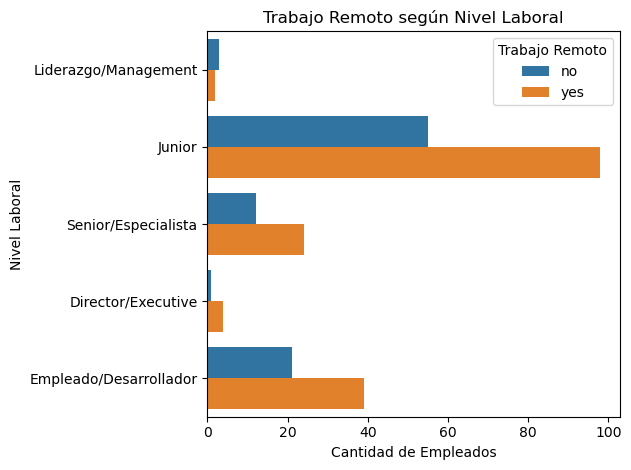

In [33]:
sns.countplot(data = df_rotacion, y='nivel_laboral', hue='trabajo_remoto')


plt.title("Trabajo Remoto según Nivel Laboral")
plt.xlabel("Cantidad de Empleados")
plt.ylabel("Nivel Laboral")
plt.xticks(rotation=0)
plt.legend(title="Trabajo Remoto")
plt.tight_layout()
plt.show()

<Axes: xlabel='nivel_satisfaccion_laboral', ylabel='count'>

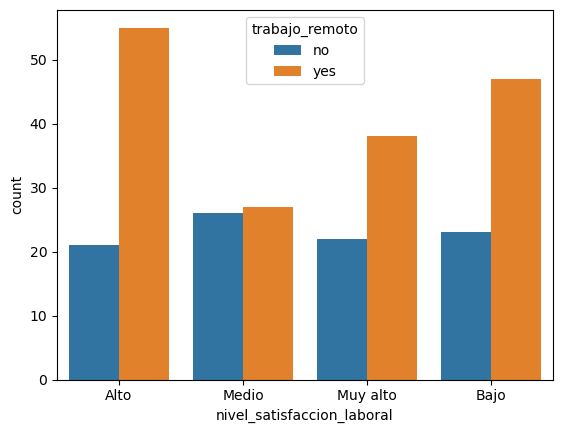

In [34]:
sns.countplot(data = df_rotacion, x='nivel_satisfaccion_laboral', hue ='trabajo_remoto')

<Axes: xlabel='nivel_satisfaccion_laboral', ylabel='count'>

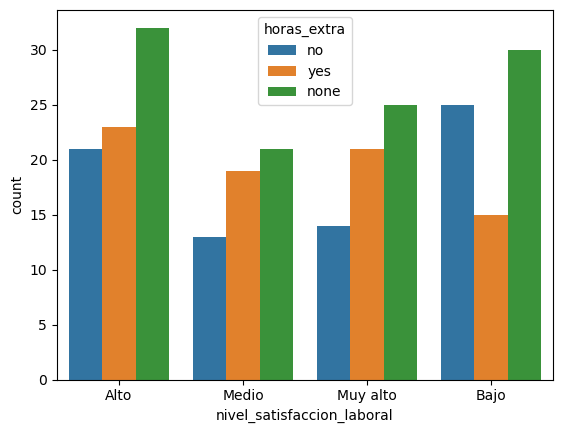

In [35]:
sns.countplot(data = df_rotacion, x='nivel_satisfaccion_laboral', hue ='horas_extra')

<Axes: xlabel='nivel_satisfaccion_laboral', ylabel='distancia_al_trabajo_km'>

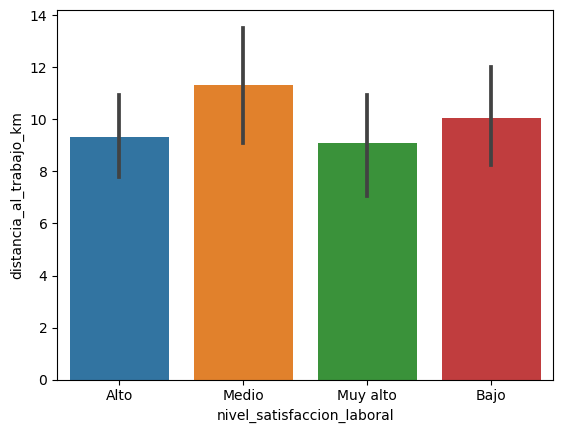

In [39]:
sns.barplot(data = df_rotacion, x ='nivel_satisfaccion_laboral', y='distancia_al_trabajo_km')

<Axes: xlabel='años_con_el_mismo_jefe', ylabel='nivel_laboral'>

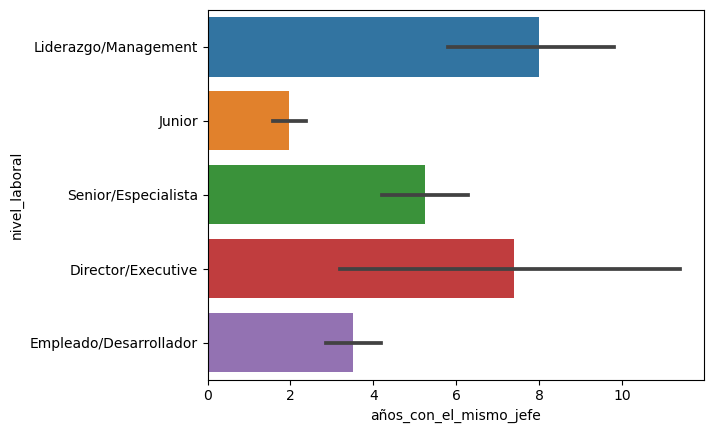

In [40]:
sns.barplot(data = df_rotacion, y='nivel_laboral', x='años_con_el_mismo_jefe')

<Axes: xlabel='count', ylabel='nivel_laboral'>

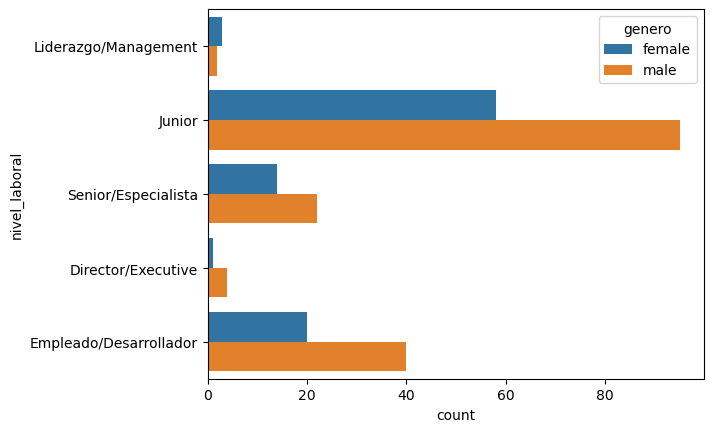

In [41]:
sns.countplot(data = df_rotacion, y='nivel_laboral', hue='genero')

In [42]:
for col in df_rotacion.select_dtypes(include='number').columns:
    print(f"\n📊 Estadísticas para columna: '{col}'")
    print("-" * 40)
    print(f"Valores más frecuentes:\n{df_rotacion[col].describe().round(2)}")


📊 Estadísticas para columna: 'años_en_la_empresa'
----------------------------------------
Valores más frecuentes:
count    259.00
mean       5.41
std        6.17
min        0.00
25%        1.00
50%        4.00
75%        8.00
max       40.00
Name: años_en_la_empresa, dtype: float64

📊 Estadísticas para columna: 'años_con_el_mismo_jefe'
----------------------------------------
Valores más frecuentes:
count    259.00
mean       3.00
std        3.14
min        0.00
25%        0.00
50%        2.00
75%        6.00
max       14.00
Name: años_con_el_mismo_jefe, dtype: float64

📊 Estadísticas para columna: 'salario_anual'
----------------------------------------
Valores más frecuentes:
count       259.00
mean      50025.56
std       32242.07
min       10090.00
25%       28111.13
50%       49410.00
75%       53914.11
max      198450.00
Name: salario_anual, dtype: float64

📊 Estadísticas para columna: 'distancia_al_trabajo_km'
----------------------------------------
Valores más frecuentes:
co

### 📊 **Resumen de estadísticas clave**

| **Columna**                           | **Media**  | **Mínimo (min)** | **Máximo (max)** |
|---------------------------------------|------------|------------------|------------------|
| **años_en_la_empresa**                | 5.41       | 0.00             | 40.00            |
| **años_con_el_mismo_jefe**            | 3.00       | 0.00             | 14.00            |
| **salario_anual**                     | 50025.56   | 10090.00         | 198450.00        |
| **distancia_al_trabajo_km**           | 9.88       | 1.00             | 29.00            |


### 🧠 Conclusión General

Los empleados que rotan podrían estar influenciados por una combinación de factores como:

- 😞 **Baja satisfacción laboral**
- 🧊 **Escaso compromiso**
- 💸 **Compensación poco competitiva**
- 📍 **Distancia al trabajo**
- 🔄 **Inestabilidad en la gestión**

Todos estos elementos impactan no solo en la **permanencia**, sino también en la **calidad de vida laboral** de los empleados.

---

### 🔍 Más allá de lo tradicional...

Más allá de los indicadores clásicos (en los que habitualmente centramos la atención), es necesario poner el foco en un aspecto muchas veces subestimado pero **profundamente influyente**:  
**💚 la salud mental en el entorno laboral.**

- 😓 Presión constante  
- 🫥 Falta de reconocimiento  
- 💤 Agotamiento emocional  
- 🧩 Desconexión con el propósito

Todos estos aspectos pueden propiciar la rotación, incluso cuando los factores "medibles" parecen estar bajo control (como hemos visto en este primer análisis, carente de conclusiones determinantes).

---

### 🧭 ¿Y ahora qué?

📌 Bajo la petición empresarial de profundizar en esta investigación, y con la intención de explorar lo que muchas veces no se ve, en el siguiente análisis **exploraremos el impacto de la salud mental en el entorno laboral**.

Este enfoque permitirá enriquecer la visión estratégica de retención con una perspectiva más:

- 🤝 **Humana**  
- 🧩 **Integral**  
- 🛡️ **Preventiva**

###  ✅ **Reflexión final**: Incluir la salud mental en la estrategia de retención es esencial. 

**La rotación también puede ser síntoma de agotamiento emocional, falta de apoyo y baja valoración interna.**

In [43]:
df_rotacion.to_csv('../files/processed/rotacion_contexto.csv')